# Question 1

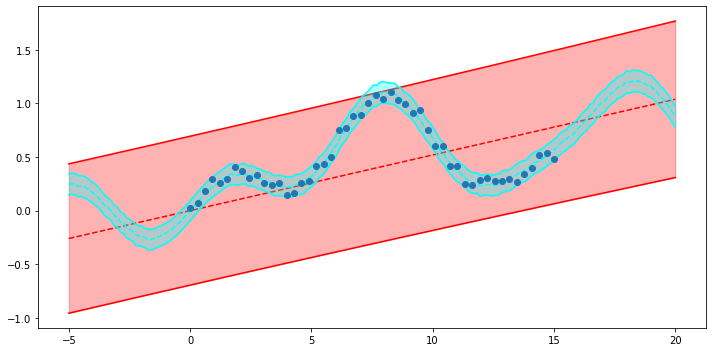

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42)

x = np.linspace(0,15,50)
y = 0.2*np.sin(x) + 0.5*np.sin(x**2/40) + 0.05*x
y += 0.05*np.random.randn(x.shape[0])

m_linear = sm.OLS(y,x)
results = m_linear.fit()

design = np.concatenate((
  np.sin(x).reshape(-1,1),
  np.sin(x**2/40).reshape(-1,1),
  x.reshape(-1,1),
  np.sin(x**2/20).reshape(-1,1),  # New tern
  np.sin(x**3).reshape(-1,1)      # New term
),axis=1)

m_linear_basis = sm.OLS(y,design)
results_basis = m_linear_basis.fit()

x_pred = np.linspace(-5,20,200).reshape(-1,1)
design_pred = np.concatenate((
  np.sin(x_pred),
  np.sin(x_pred**2/40),
  x_pred,
  np.sin(x_pred**2/20),           # New term
  np.sin(x_pred**3)               # New term
),axis=1)
y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,zorder=2)
ax.plot(x_pred, y_pred_linear['mean'], color='red',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'],color='red',linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'],color='red',linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'], y_pred_linear['obs_ci_upper'],color='red',alpha=0.3,zorder=1)

ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'],color='cyan', linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'],color='cyan', linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'],color='cyan',alpha=0.3,zorder=1)

plt.tight_layout()

In [15]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1534.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                    4.66e-49
Time:                        17:24:19   Log-Likelihood:                          86.051
No. Observations:                  50   AIC:                                     -162.1
Df Residuals:                      45   BIC:                                     -152.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The model still fits the data very well. First 3 coefficients are not changed by very much, and the new 2 are very small. This means that the model has learned that any $\sin\left(\frac{x^2}{20}\right)$ and $\sin\left(x^3\right)$ terms contribute very little to the response variables. This is to be expected because we know that the response variable does not include any of those terms.

# Question 2


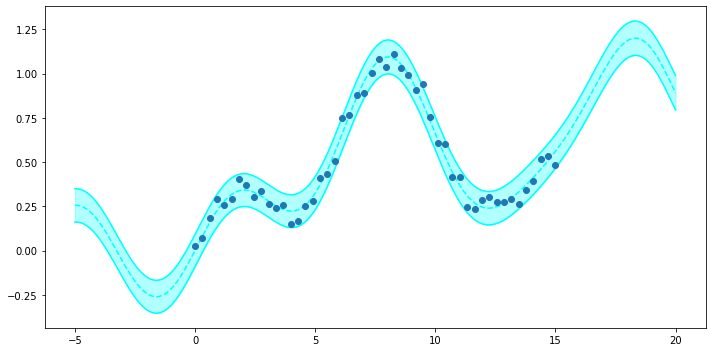

In [17]:
design = np.concatenate((
  np.sin(x).reshape(-1,1),
  np.sin(x**2/40).reshape(-1,1),
  x.reshape(-1,1),
  -np.sin(x).reshape(-1,1)        # New term
),axis=1)

m_linear_basis = sm.OLS(y,design)
results_basis = m_linear_basis.fit()

x_pred = np.linspace(-5,20,200).reshape(-1,1)
design_pred = np.concatenate((
  np.sin(x_pred),
  np.sin(x_pred**2/40),
  x_pred,
  -np.sin(x_pred),                # New term
),axis=1)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y,zorder=2)

ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan',linestyle='--',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'],color='cyan', linestyle='-',zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'],color='cyan', linestyle='-',zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'],color='cyan',alpha=0.3,zorder=1)

plt.tight_layout()

In [18]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2592.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                    3.49e-52
Time:                        17:24:36   Log-Likelihood:                          85.315
No. Observations:                  50   AIC:                                     -164.6
Df Residuals:                      47   BIC:                                     -158.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coefficient for `x1` and `x3` are unchanged, but the original value of `x2` is now split between `x2` and `x4`. This is because the second and fourth design vectors are proportional to one another. In fact, the fourth is just the negative of the second. Decreasing the value of `x2` by some amount will have the same effect on the response variable as increasing `x4` by the same amount. In other words, the design vectors are not linearly independent.

# Question 3

Ridge regression rewards models in which the coefficients are roughly equally sized. This is because the reward is proportional to the magnitude of the coefficient vector. Suppose $\beta_1 > \beta_2$, a small decrease in $\beta_1$ would require a larger increase in $\beta_2$ to maintain the same reward. As such, the optimal reward occurs when $\beta_1=\beta_2$.

Lasso regression rewards models with large coefficients. It relies on the assumption that if you make $\beta_1$ smaller, $\beta_2$ will have to get bigger by a greater amount in order to achieve an equally good fit. Since this would make the sum of the coefficients bigger, this model is preferable by lasso regression. It therefore has a tendency to make most coefficients very small, while putting a lot of weight on a few.

# Tick


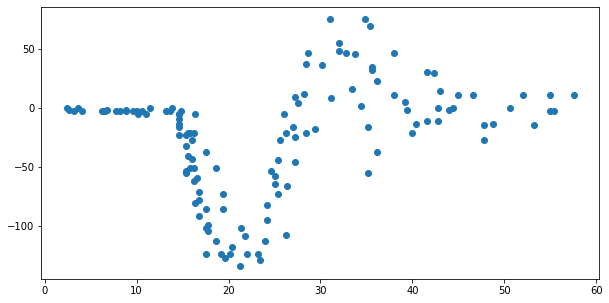

In [19]:
from pandas import read_csv

df = read_csv('./dataset-72001.csv')
x = np.array(df.values)[:,0]
y = np.array(df.values)[:,1]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x,y)

I've decided to split the data into two chunks &mdash; $0\leq x \leq 13$, and $x > 13$, because by observation this seems to be the cutoff between a straight line segment and a more complicated quasi-sinusoidal curve.

13.2


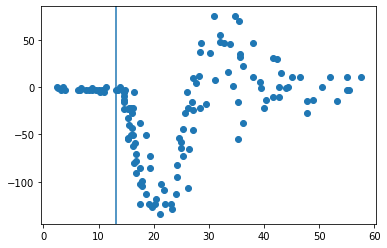

In [121]:
cutoff_point = np.where(x>13)[0][0]
print(x[cutoff_point])
plt.scatter(x,y)
plt.axvline(x[cutoff_point])

I've decided to model the straight-line-looking segment as a straight line with normally distributed noise.

$y \sim \mathbf{N}\left(\beta_1x + \beta_21, \sigma^2\right)$

There aren't many data points so to prevent overfitting I'm using mostly L2 regularisation so that the slope doesn't become too steep

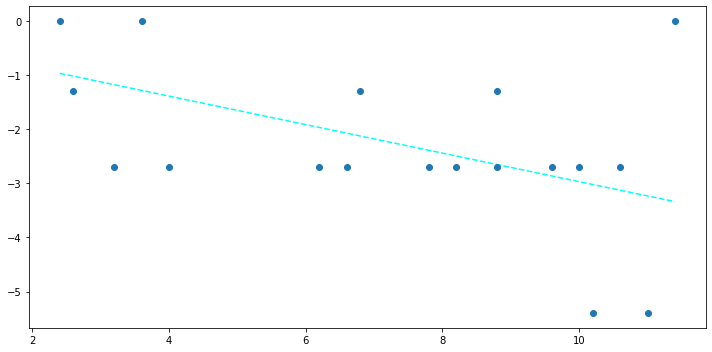

In [161]:
x_left = x[:cutoff_point]
y_left = y[:cutoff_point]

def make_design_matrix(x):
  return np.concatenate((
    x,
    np.ones(x.shape)
  ),axis=1)

design = make_design_matrix(x_left.reshape(-1, 1))

m_linear_basis = sm.GLM(y_left,design, family=sm.families.Gaussian())
results_basis = m_linear_basis.fit_regularized(alpha=0.1, L1_wt=0.3)

x_pred = np.linspace(np.min(x_left),np.max(x_left),200).reshape(-1,1)
design_pred = make_design_matrix(x_pred)
y_pred_linear_basis = results_basis.predict(design_pred)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x_left,y_left,zorder=2)

ax.plot(x_pred, y_pred_linear_basis, color='cyan',linestyle='--',zorder=1)

plt.tight_layout()

On the wavy part of the data I want to model the response variable as a sum of sine waves, but I don't know the exact frequencies. Therefore, I will provide a range of frequencies in the design matrix, and use heavy L1 regularisation to suppress the less relevant ones.

I will also provide cosine waves to allow for a phase shift, as I don't know the phase of the sine waves

$\beta_i \sin(fx) + \beta_j \cos(fx) \equiv \sqrt{\beta_i^2+\beta_j^2}\sin\left(fx+\arctan{\frac{\beta_j}{\beta_i}}\right)$

I will also include linear and constant terms in the design matrix to allow for a y-intercept and some general long-term slope

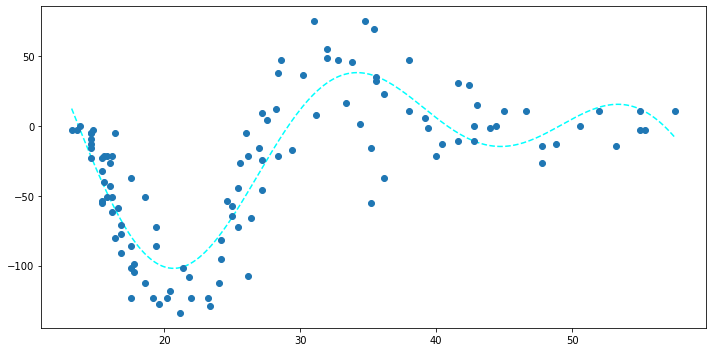

In [173]:
x_right = x[cutoff_point:]
y_right = y[cutoff_point:]

def make_design_matrix(x):
  return np.concatenate((
    np.sin(x/4),
    np.cos(x/4),
    np.sin(x/6),
    np.cos(x/6),
    np.sin(x/8),
    np.cos(x/8),
    x,
    np.ones(x.shape)
  ),axis=1)

design = make_design_matrix(x_right.reshape(-1, 1))

m_linear_basis = sm.GLM(y_right,design, family=sm.families.Gaussian())
results_basis = m_linear_basis.fit_regularized(alpha=0.3, L1_wt=1)

x_pred = np.linspace(np.min(x_right),np.max(x_right),200).reshape(-1,1)
design_pred = make_design_matrix(x_pred)
y_pred_linear_basis = results_basis.predict(design_pred)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x_right,y_right,zorder=2)

ax.plot(x_pred, y_pred_linear_basis, color='cyan',linestyle='--',zorder=1)

plt.tight_layout()

In [174]:
s1, c1, s2, c2, s3, c3, l, c = results_basis.params
print(f"β1={np.sqrt(s1*s1+c1*c1)}")
print(f"β2={np.arctan2(c1,s1)}")
print("")

print(f"β3={np.sqrt(s2*s2+c2*c2)}")
print(f"β4={np.arctan2(c2,s2)}")
print("")

print(f"β5={np.sqrt(s3*s3+c3*c3)}")
print(f"β6={np.arctan2(c3,s3)}")
print("")

print(f"β7={l}")
print("")

print(f"β8={c}")

β1=58.732966133400254
β2=0.0

β3=59.746055856463
β4=0.6210655090086246

β5=0.0
β6=0.0

β7=-0.5748644688810405

β8=10.406275029797776


The final model ended up looking like:

$y \sim \mathbf{N}\left(\beta_1\sin\left(\frac{x}{4}\right)+\beta_3\sin\left(\frac{x}{6}+\beta_4\right)+\beta_7x+\beta_8, \sigma^2\right)$